In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
from sklearn import metrics 
from math import sqrt
from sklearn.model_selection import GridSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
A = pd.read_csv("log2.csv")
X = A.values[:,[0,1,2,3,5,6,7,8,9,10,11]]
Y = A.values[:,4]
X, Xt, Y, Yt = train_test_split(X, Y, train_size=0.7, random_state=2)

In [ ]:
param_grid=[
  {
      'n_neighbors':[3,5, 7, 10],
      'weights':['uniform','distance'],
      'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
      'leaf_size':[10,15,30,50]
  }
]
cv = GridSearchCV(clf, param_grid=param_grid, cv = 10, n_jobs=-1,scoring='accuracy')
best_clf = cv.fit(X,Y)
print(best_clf.best_params_)


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
best=KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='brute', leaf_size=10)
best.fit(X,Y)

KNeighborsClassifier(algorithm='brute', leaf_size=10, n_neighbors=10,
                     weights='distance')

In [ ]:
y_pred = best.predict(Xt)
print("accuracy: ", metrics.accuracy_score(Yt, y_pred))

accuracy:  0.993194164682903


In [ ]:
from sklearn.metrics import classification_report
target_names = ['allow', 'deny', 'drop','reset-both']
print(classification_report(Yt, y_pred, target_names=target_names,digits=5))



              precision    recall  f1-score   support

       allow    0.99813   0.99321   0.99566     18843
        deny    0.98046   0.99153   0.98597      7440
        drop    0.99384   0.99938   0.99660      6455
  reset-both    0.00000   0.00000   0.00000        28

    accuracy                        0.99319     32766
   macro avg    0.74311   0.74603   0.74456     32766
weighted avg    0.99242   0.99319   0.99280     32766



In [ ]:
import seaborn as sns


def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel("Mean_test_score")
    ax.legend(title=param_z)
    return fig

def plot_cv_result(cv_results, param_x, metric='mean_test_score'):
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x,  y=metric, hue=None, data=cv_results, ci=99, n_boot=64, ax=ax, fontsize=50)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x, fontsize=20)
    ax.set_ylabel("Mean_test_score", fontsize=20)
    
   
    return fig

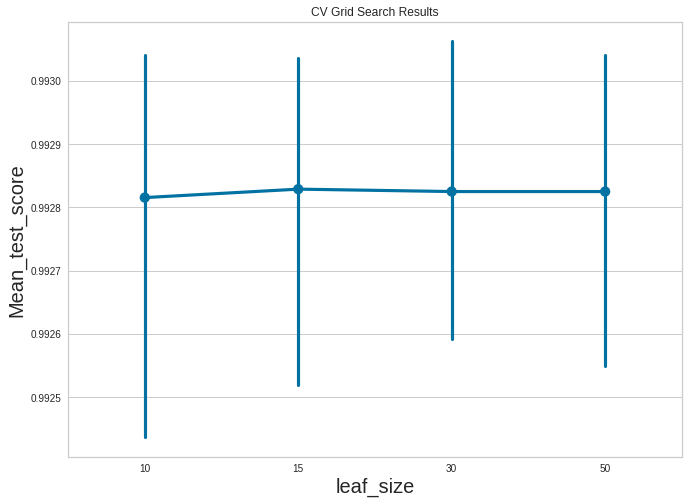

In [ ]:
fig = plot_cv_result(cv.cv_results_, 'leaf_size')